## Nucleosynthetic yields
These are key to every chemical evolution model. Chempy supports three nucleosynthetic channels at the moment:
- Core-Collapse Supernova (CC-SN)
- Supernova of type Ia (SN Ia)
- Winds from Asymptotic Giant Branch phase of stars (AGB)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Chempy.parameter import ModelParameters
from Chempy.yields import SN2_feedback, AGB_feedback, SN1a_feedback, Hypernova_feedback

In [3]:
from Chempy.infall import PRIMORDIAL_INFALL, INFALL

In [4]:
 # This loads the default parameters, you can check and change them in paramter.py

a = ModelParameters()

In [5]:
# Implemented SN Ia yield tables

a.yield_table_name_1a_list 

['Iwamoto', 'Thielemann', 'Seitenzahl']

In [6]:
# AGB yields implemented

a.yield_table_name_agb_list 

['Karakas', 'Nugrid', 'Karakas_net_yield', 'Ventura', 'Karakas16_net']

In [7]:
# CC-SN yields implemented

a.yield_table_name_sn2_list 

['chieffi04', 'Nugrid', 'Nomoto2013', 'Portinari']

In [8]:
# Hypernova yields (is mixed with Nomoto2013 CC-SN yields for stars more massive than 25Msun)

a.yield_table_name_hn_list 

['Nomoto2013']

In [9]:
# Here we show the available mass and metallicity range for each yield set

# First for CC-SNe

print('Available CC-SN yield parameter range')
for item in a.yield_table_name_sn2_list:
    basic_sn2 = SN2_feedback()
    getattr(basic_sn2, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_sn2.masses)
    print('provided metallicities',basic_sn2.metallicities)
    

Available CC-SN yield parameter range
----------------------------------
yield table name:  chieffi04
provided masses:  [13, 15, 20, 25, 30, 35]
provided metallicities [  0.00000000e+00   1.00000000e-06   1.00000000e-04   1.00000000e-03
   6.00000000e-03   2.00000000e-02]
----------------------------------
yield table name:  Nugrid
provided masses:  [15 20 25 32 60]
provided metallicities [0.02, 0.01]
----------------------------------
yield table name:  Nomoto2013
provided masses:  [13 15 18 20 25 30 40]
provided metallicities [0.05, 0.02, 0.008, 0.004, 0.001]
----------------------------------
yield table name:  Portinari
provided masses:  [6.0, 7.0, 9.0, 12.0, 15.0, 20.0, 30.0, 40.0, 60.0, 100.0, 120.0]
provided metallicities [0.0004, 0.004, 0.008, 0.02, 0.05]


Hyper Nova (HN) is only provided for Nomoto 2013 CC-SN yields and it is mixed 50/50 with it for stars with mass >= 25 Msun


In [10]:
# Then for Hypernovae

print('Available HN yield parameter range')
for item in a.yield_table_name_hn_list:
    basic_hn = Hypernova_feedback()
    getattr(basic_hn, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_hn.masses)
    print('provided metallicities',basic_hn.metallicities)

Available HN yield parameter range
----------------------------------
yield table name:  Nomoto2013
provided masses:  [20 25 30 40]
provided metallicities [0.05, 0.02, 0.008, 0.004, 0.001]


In [11]:
# Here for AGB stars

print('Available AGB yield parameter range')
for item in a.yield_table_name_agb_list:
    basic_agb = AGB_feedback()
    getattr(basic_agb, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_agb.masses)
    print('provided metallicities',basic_agb.metallicities)

Available AGB yield parameter range
----------------------------------
yield table name:  Karakas
provided masses:  [ 1.    1.25  1.5   1.75  1.9   2.    2.25  2.5   3.    3.5   4.    4.5   5.
  5.5   6.    6.5 ]
provided metallicities [0.02, 0.008, 0.004, 0.0001]
----------------------------------
yield table name:  Nugrid
provided masses:  [ 1.65  2.    3.    5.  ]
provided metallicities [0.02, 0.01]
----------------------------------
yield table name:  Karakas_net_yield
provided masses:  [ 1.    1.25  1.5   1.75  1.9   2.    2.25  2.5   3.    3.5   4.    4.5   5.
  5.5   6.    6.5 ]
provided metallicities [0.02, 0.008, 0.004, 0.0001]
----------------------------------
yield table name:  Ventura
provided masses:  [ 8.    7.5   7.    6.5   6.    5.5   5.    4.5   4.    3.5   3.    2.5
  2.25  2.    1.75  1.5   1.25  1.  ]
provided metallicities [0.04, 0.018, 0.008, 0.004, 0.001, 0.0003]
----------------------------------
yield table name:  Karakas16_net
provided masses:  [ 8.    7.   

In [12]:
# And for SN Ia

print('Available SN Ia yield parameter range')
for item in a.yield_table_name_1a_list:
    basic_1a = SN1a_feedback()
    getattr(basic_1a, item)()
    print('----------------------------------')
    print('yield table name: ',item)
    print('provided masses: ', basic_1a.masses)
    print('provided metallicities',basic_1a.metallicities)

Available SN Ia yield parameter range
----------------------------------
yield table name:  Iwamoto
provided masses:  [1.38]
provided metallicities [0.02, 0.0]
----------------------------------
yield table name:  Thielemann
provided masses:  [1.37409]
provided metallicities [0.02]
----------------------------------
yield table name:  Seitenzahl
provided masses:  [1.4004633930489443]
provided metallicities [0.02]


In [13]:
from Chempy.data_to_test import elements_plot
from Chempy.solar_abundance import solar_abundances

## Elements availability
usually not all elements are provided by a yield table. We have a handy plotting routine to show which elements are given. We check for the default and the alternative yield table.

[0.0]

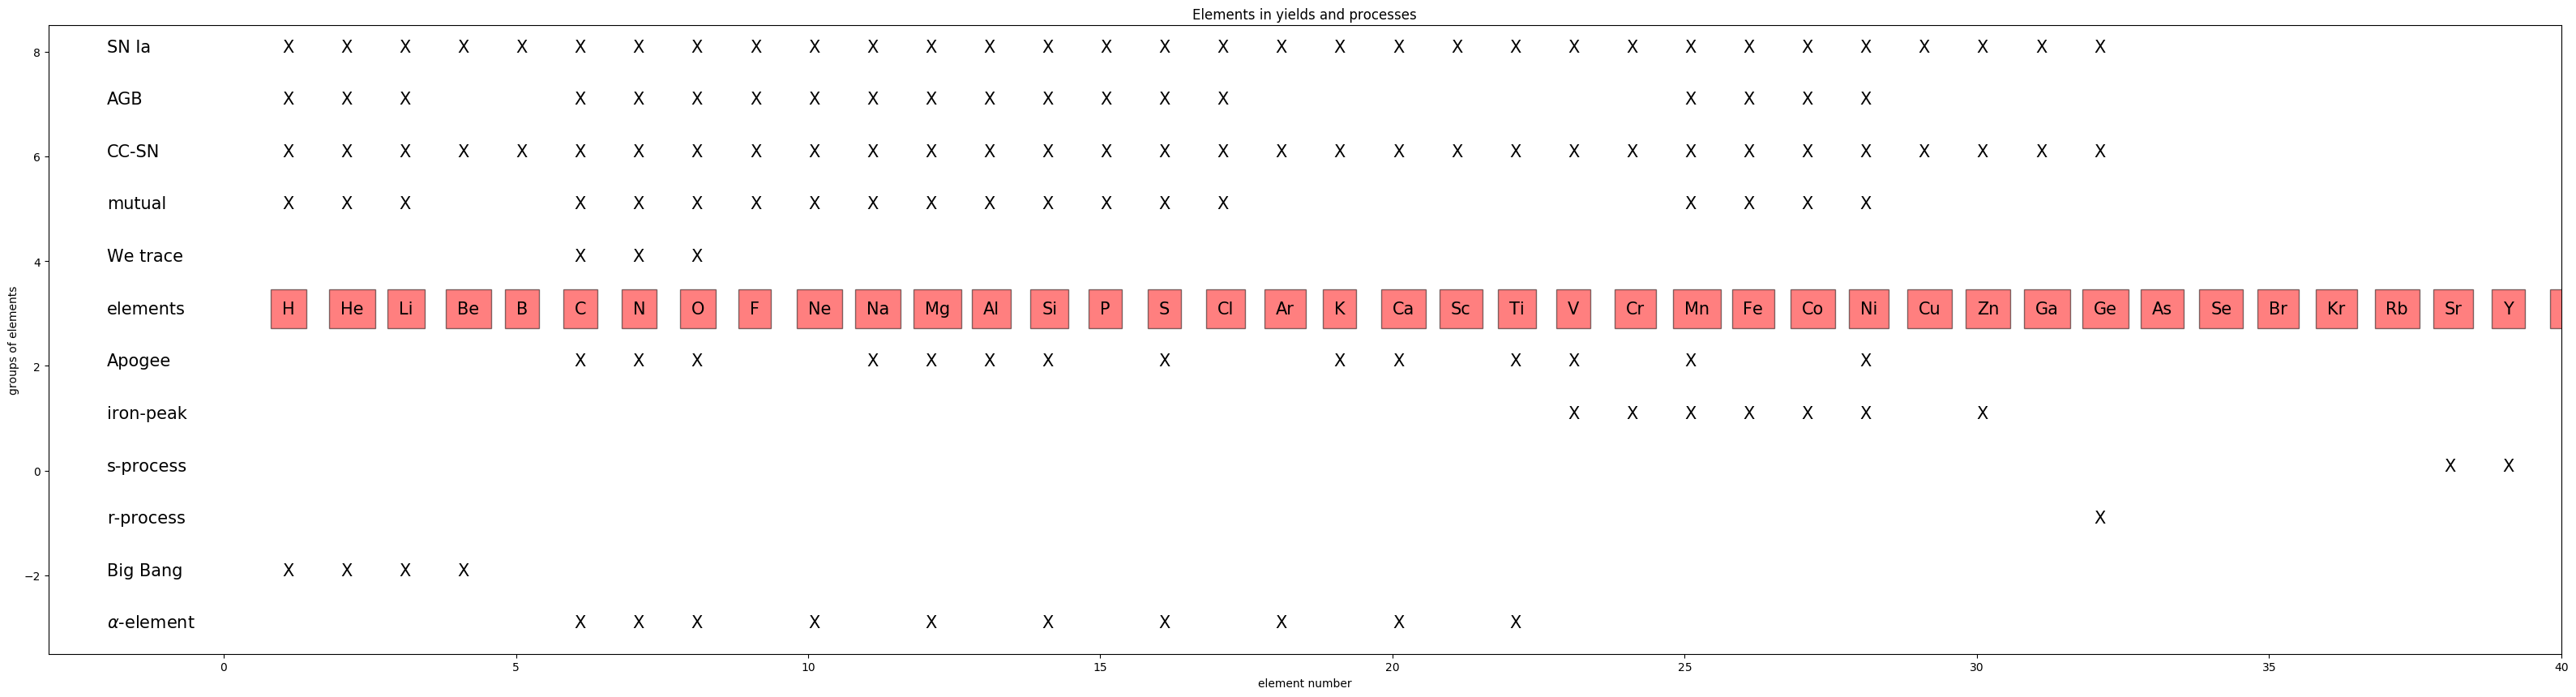

In [14]:
# To get the element list we initialise the solar abundance class

basic_solar = solar_abundances()




# we load the default yield set:

basic_sn2 = SN2_feedback()
getattr(basic_sn2, "Nomoto2013")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Seitenzahl")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas_net_yield")()


#Now we plot the elements available for the default yield set and which elements are available for specific surveys and come from which nucleosynthetic channel

elements_plot('default', basic_agb.elements,basic_sn2.elements,basic_1a.elements,['C','N','O'], basic_solar.table,40)

[0.0]

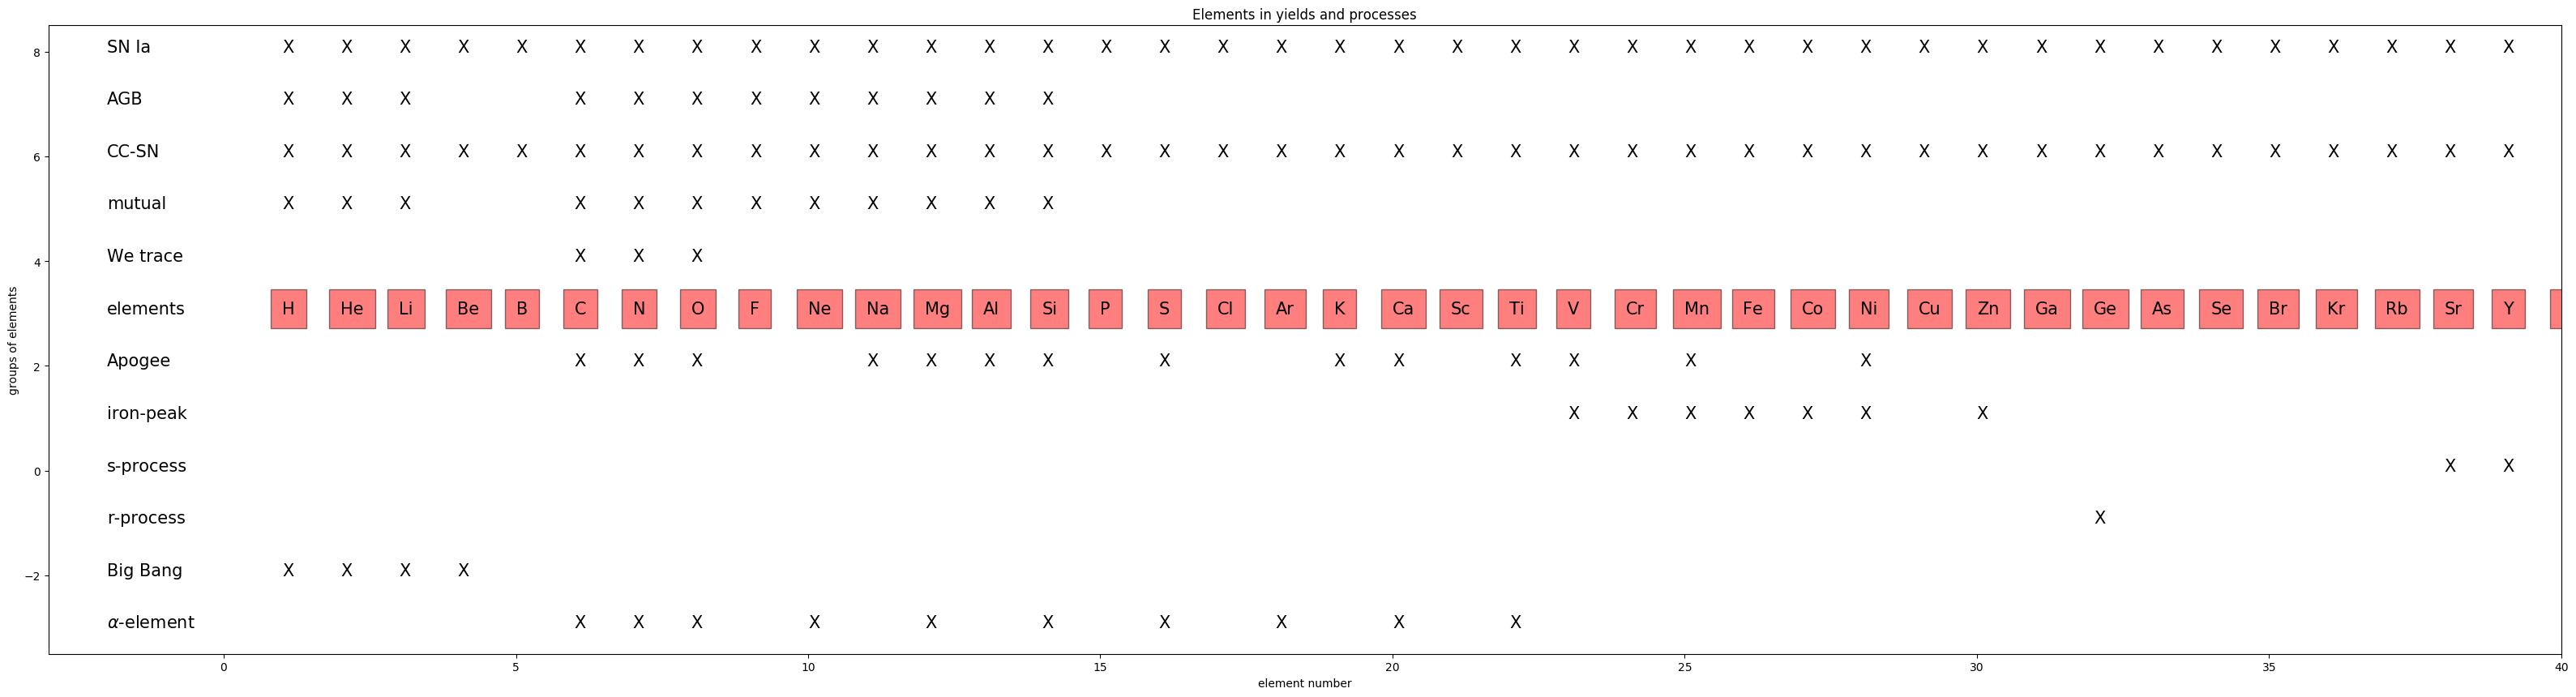

In [15]:
# Then we load the alternative yield set:

basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04")()
basic_1a = SN1a_feedback()
getattr(basic_1a, "Thielemann")()
basic_agb = AGB_feedback()
getattr(basic_agb, "Ventura")()

#And again plot the elements available 

elements_plot('alternative', basic_agb.elements,basic_sn2.elements,basic_1a.elements,['C','N','O'], basic_solar.table,40)

## CC-SN yields
Here we visualise the yield in [X/Fe] for the whole grid in masses and metallicities for two different yields sets
- Interestingly CC-SN ejecta can be Solar in their alpha-enhancement for low-mass progenitors (=13Msun)
- Ths effect is even stronger for the Chieffi04 yields

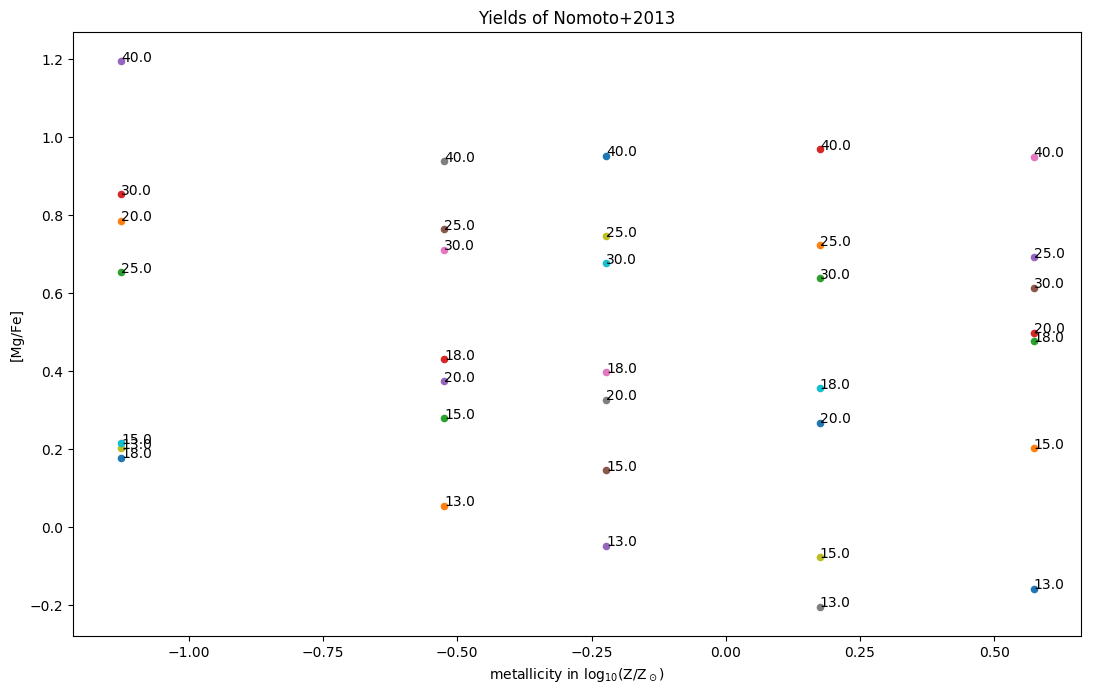

In [16]:
# We need solar abundances for normalisation of the feedback

basic_solar.Asplund09()

# Then we plot the [Mg/Fe] of Nomoto+ 2013 for all masses and metallicities 

from Chempy.data_to_test import yield_plot
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "Nomoto2013")()
yield_plot('Nomoto+2013', basic_sn2, basic_solar, 'Mg')

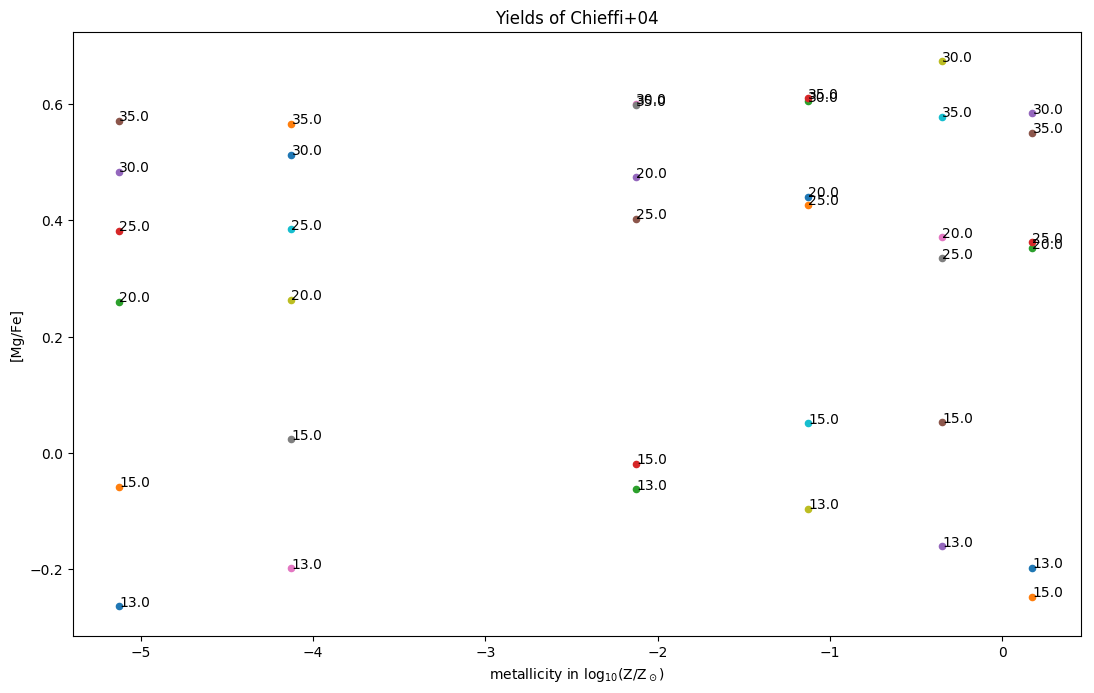

In [17]:
# And we plot the same for Chieffi+ 2004 CC-yields

basic_sn2 = SN2_feedback()
getattr(basic_sn2, "chieffi04")()
yield_plot('Chieffi+04', basic_sn2, basic_solar, 'Mg')

## Yield comparison
We can plot the differences of the two yield tables for different elements (They are copied into the output/ folder). Here only the result for Ti is displayed.

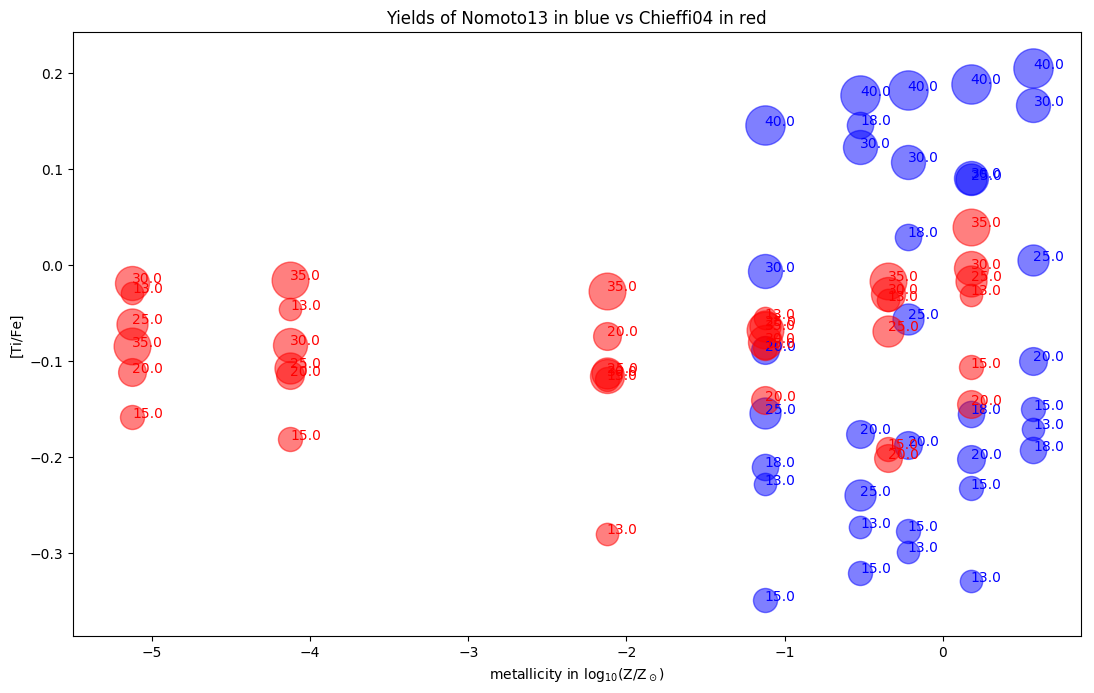

In [18]:
# Now we plot a comparison for different elements between Nomoto+ 2013 and Chieffi+ 2004 CC-yields: 
# You can look into the output/ folder and see the comparison for all those elements

from Chempy.data_to_test import yield_comparison_plot
basic_sn2 = SN2_feedback()
getattr(basic_sn2, "Nomoto2013")()
basic_sn2_chieffi = SN2_feedback()
getattr(basic_sn2_chieffi, "chieffi04")()
for element in ['C', 'N', 'O', 'Mg', 'Ca', 'Na', 'Al', 'Mn','Ti']:
    yield_comparison_plot('Nomoto13', 'Chieffi04', basic_sn2, basic_sn2_chieffi, basic_solar, element)

## AGB yield comparison
We have a look at the Carbon and Nitrogen yields.
We see that high mass AGB stars produce less fraction of C than low-mass AGB stars and that its vice versa for N. The C/N ratio should be IMF sensitive.

/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:250: RuntimeWarning: invalid value encountered in log10
  fractional_feedback = np.log10(ejecta_element)
/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:264: RuntimeWarning: invalid value encountered in log10
  fractional_feedback = np.log10(ejecta_element)


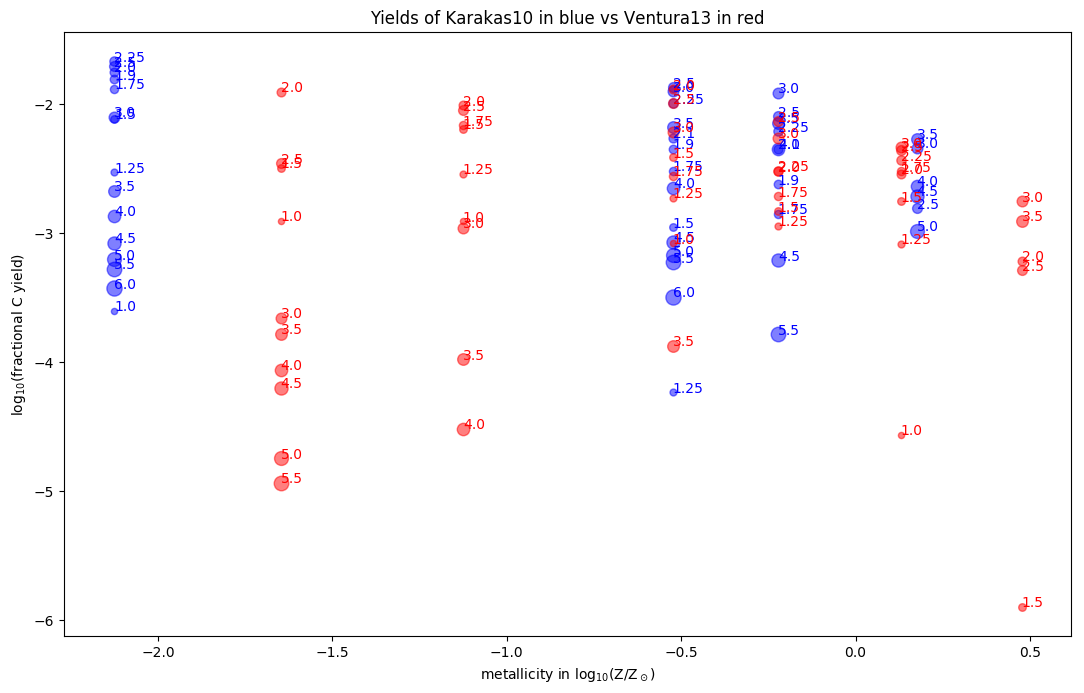

In [19]:
# We can also plot a comparison between Karakas+ 2010 and Ventura+ 2013 AGB-yields
# Here we plot the fractional C yield

from Chempy.data_to_test import fractional_yield_comparison_plot
basic_agb = AGB_feedback()
getattr(basic_agb, "Karakas_net_yield")()
basic_agb_ventura = AGB_feedback()
getattr(basic_agb_ventura, "Ventura")()
fractional_yield_comparison_plot('Karakas10', 'Ventura13', basic_agb, basic_agb_ventura, basic_solar, 'C')


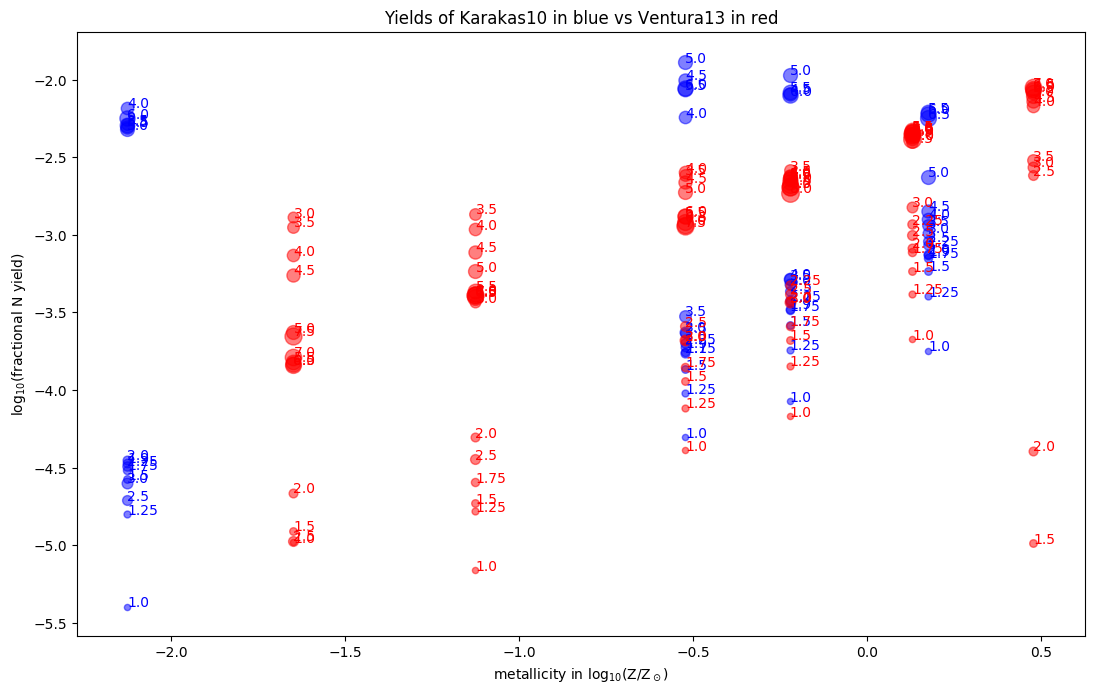

In [20]:
# Here we plot the fractional N yield

fractional_yield_comparison_plot('Karakas10', 'Ventura13', basic_agb, basic_agb_ventura, basic_solar, 'N')

## Yield table query and remnant fraction
- Here you see how the yield tables are queried (the metallicity accesses the yield table)
- For net yield the remnant fraction + the 'unprocessed mass in winds' sums to unity.
- The changes come from destroyed Hydrogen that is fused into other elements

In [21]:
# Different entries of the yield table are queried

print('Mass, Remnant mass fraction, Unprocessed mass in winds fraction, destroyed Hydrogen of total mass')
for i in range(len(basic_agb.masses)):
    print(basic_agb.table[0.02]['Mass'][i],basic_agb.table[0.02]['mass_in_remnants'][i],basic_agb.table[0.02]['unprocessed_mass_in_winds'][i],basic_agb.table[0.02]['H'][i])

Mass, Remnant mass fraction, Unprocessed mass in winds fraction, destroyed Hydrogen of total mass
6.5 0.148153846154 0.851846634066 -0.0645761123077
6.0 0.154833333333 0.845167850171 -0.05858918
5.5 0.163636363636 0.836364075317 -0.0500664272727
5.0 0.1758 0.824200345995 -0.036420346
4.5 0.189333333333 0.810667091437 -0.0241264777778
4.0 0.198 0.802000124169 -0.01576447475
3.5 0.205142857143 0.794856793518 -0.0267895631429
3.0 0.227333333333 0.772666859301 -0.0231753986667
2.5 0.2652 0.73480021181 -0.0120128156
2.25 0.293333333333 0.706666844514 -0.00669050222222
2.0 0.32 0.680000134537 -0.005093962
1.9 0.331578947368 0.668420587724 -0.00571103473684
1.75 0.351428571429 0.648571354226 -0.00674639428571
1.5 0.4 0.599999170392 -0.00855465733333
1.25 0.4592 0.540800222499 -0.0098353144
1.0 0.564 0.436004444266 -0.008104831


## SN Ia yields
Here we see that the SNIa ejecta differ quite strongly for our two yieldtables

In [22]:
# Here we compare the yields for different iron-peak elements for Seitenzahl+ 2013 and Thielemann+ 2003 SNIa tables

basic_1a = SN1a_feedback()
getattr(basic_1a, 'Seitenzahl')()
basic_1a_alternative = SN1a_feedback()
getattr(basic_1a_alternative, 'Thielemann')()
print('Mass fraction of SN1a ejecta: Cr, Mn, Fe and Ni')
print('Seitenzahl2013')
print(basic_1a.table[0.02]['Cr'],basic_1a.table[0.02]['Mn'],basic_1a.table[0.02]['Fe'],basic_1a.table[0.02]['Ni'])
print('Thielemann2003')
print(basic_1a_alternative.table[0.02]['Cr'],basic_1a_alternative.table[0.02]['Mn'],basic_1a_alternative.table[0.02]['Fe'],basic_1a_alternative.table[0.02]['Ni'])


Mass fraction of SN1a ejecta: Cr, Mn, Fe and Ni
Seitenzahl2013
[ 0.00735471] [ 0.00949686] [ 0.52839653] [ 0.05283965]
Thielemann2003
[ 0.00394618] [ 0.00475951] [ 0.55984251] [ 0.08281772]
